# Section 1: Dimensionality reduction, SVD & PCA

In this section, we're going to use tools learnt in Section 1 and learn about methods to uncover relationships between hypothalamic neural activity and social behavior using a dataset from [Remedios et ., 2017, Nature](https://https://www.nature.com/articles/nature23885)

In [ ]:
# Import neccessary modules and helper functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA

# Set color map for indicating behaviors
color_names = ["grey",
               "red",
               "forest green",
               "amber",
               "windows blue"]
colors = sns.xkcd_palette(color_names)
colors_sex = sns.xkcd_palette(color_names[2:5])
colors_beh = sns.xkcd_palette(color_names)

cmap_beh = ListedColormap(colors)
cmap_sex = ListedColormap(colors[2:4])

def forceAspect(ax,aspect):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
    
def plot_trajectory_beh(z, x,a1,a2,ax=None, alpha = 1, ls="-", colors = colors):
    zcps = np.concatenate(([0], np.where(np.diff(z))[0] + 1, [z.size]))
    if ax is None:
        fig = plt.figure(figsize=(4, 4))
        ax = fig.gca()
    for start, stop in zip(zcps[:-1], zcps[1:]):
        ax.plot(x[start:stop + 1, a1],
                x[start:stop + 1, a2],
                lw=1, ls=ls,
                color=colors[z[start] % len(colors)],
                alpha=alpha)
    return ax

*Include explanation about dataset here with figure*

In [ ]:
# Load data

remedios_data = loadmat("vmhvl_remedios.mat");

neural_data = remedios_data['neural_data']
attack_vector = remedios_data['attack_vector']
sex_vector = remedios_data['sex_vector']


what is the data?, please pull out the 3 relevant data types.
store them as named variables?

Let's visualize the neural data and plot an activity matrix, a plot showing the behaviors perfomed by the resident mouse and some example neurons

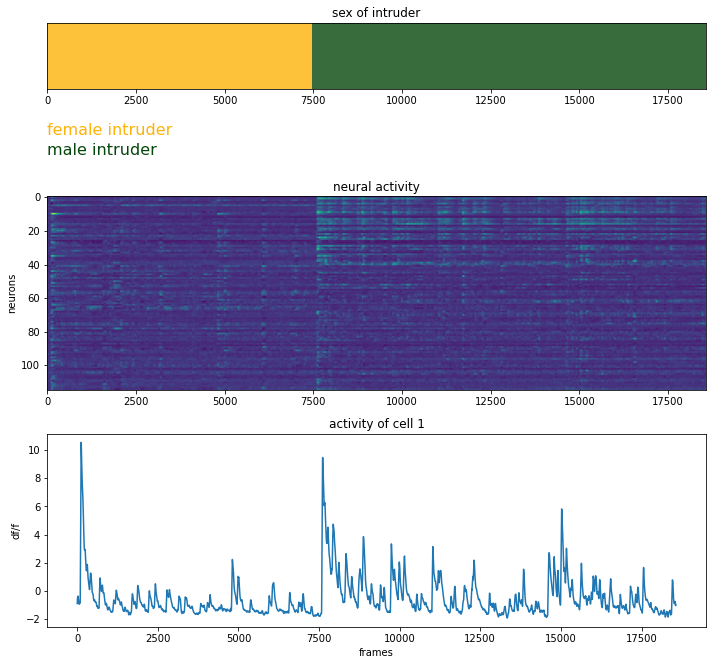

In [ ]:
# Create a plot for showing behavior raster, neural raster & an example neuron

plt.figure(figsize=[10,10])
ax1 = plt.subplot(311)
ax1.imshow(sex_vector, aspect='auto', cmap=cmap_sex, alpha = 0.8, interpolation = 'nearest')
forceAspect(ax1,aspect=10)
ax1.set_yticks([])
ax1.set_title('sex of intruder')
ax1.text(0,1.2,'female intruder ',color = colors_sex[1],fontsize=16)
ax1.text(0,1.5,'male intruder',color = colors_sex[0],fontsize=16)

ax2 = plt.subplot(312)
ax2.imshow(neural_data, aspect='auto')
ax2.set_title('neural activity')
ax2.set_ylabel('neurons')

ax3 = plt.subplot(313)
ax3.plot(neural_data[0,])
ax3.set_title('activity of cell 1')
ax3.set_ylabel('df/f')
ax3.set_xlabel('frames')

plt.tight_layout() 


make them plot it? maybe easier to give it to them

Let's now use what we learnt in Section 1 to perform PCA on this data and examine the top 2 principal components

Text(0.02, 0.017, 'male intruder')

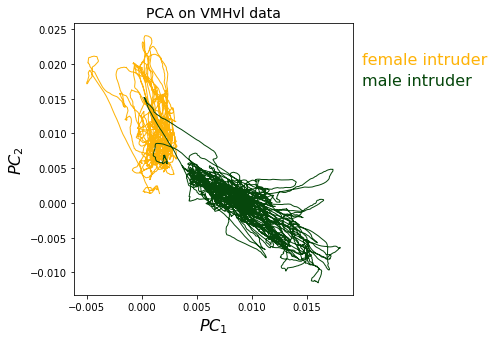

In [ ]:
# perform PCA
pca_neural = PCA(n_components=2)
pca_neural.fit_transform (neural_data)
neural_pcs = pca_neural.components_

# plot PCA, colored by intruder sex
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
plot_trajectory_beh(sex_vector[0,:],neural_pcs.T,0,1,ax=ax, colors = colors_sex)
ax.set_title('PCA on VMHvl data',fontsize = 14)
ax.set_xlabel('$PC_1$',fontsize=16)
ax.set_ylabel('$PC_2$',fontsize=16)
ax.text(0.02,0.02,'female intruder ',color = colors_sex[1],fontsize=16)
ax.text(0.02,0.017,'male intruder',color = colors_sex[0],fontsize=16)
